# Идеальная пицца?

Импортируем либы

In [35]:
import urllib.request
from bs4 import BeautifulSoup

Решил выбирать из меню Додо. Сначала получим страницу с пиццами

In [49]:
page = urllib.request.urlopen("https://dodopizza.ru/astrakhan#pizzas") # я живу в астрахани
html = page.read().decode()
page.close()

Создадим объект bs

In [51]:
soup = BeautifulSoup(html, 'lxml')

Получим список всех возможных ингредиентов

In [59]:
ingredients = set()
pizzas = soup.find_all("div", attrs={'class':"product__name product__name_pizza"}) #тег в котором лежит название пиццы
for pizza in pizzas:
    pizza_description = pizza.findNext('div').text #все что внутри тега - описание пиццы
    pizza_ingredients = pizza_description.split(', ')
    pizza_ingredients = [i.lower() for i in pizza_ingredients]
    #print(pizza_ingredients)
    ingredients.update(pizza_ingredients)    

In [60]:
ingredients

{'ананасы',
 'бекон',
 'брусника',
 'ветчина',
 'итальянские травы',
 'кисло-сладкий соус',
 'красный лук',
 'креветки',
 'кубики брынзы',
 'маслины',
 'молоко сгущенное',
 'моцарелла',
 'мясной соус болоньезе',
 'острая чоризо',
 'острый халапеньо',
 'пикантная пепперони',
 'сладкий перец',
 'сливочный соус',
 'смесь сыров чеддер и пармезан',
 'соберите свою пиццу 35 см с двумя разными вкусами',
 'соленые огурчики',
 'соус барбекю',
 'соус бургер',
 'соус ранч',
 'соус сальса',
 'соус чипотле',
 'сыр блю чиз',
 'сырный соус',
 'томатный соус',
 'томаты',
 'фарш из говядины',
 'цыпленок',
 'черный кунжут',
 'чеснок',
 'чоризо',
 'шампиньоны'}

Выставим оценки для каждого ингредиента

In [61]:
marks = {'ананасы':1,
         'бекон':5,
         'брусника':0,
         'ветчина':4,
         'итальянские травы':5,
         'кисло-сладкий соус':4,
         'красный лук':4,
         'креветки':1,
         'кубики брынзы':3,
         'маслины':2,
         'молоко сгущенное':1,
         'моцарелла':5,
         'мясной соус болоньезе':5,
         'острая чоризо' :2,
         'острый халапеньо' : 3,
         'пикантная пепперони':2,
         'сладкий перец':4,
         'сливочный соус':5,
         'смесь сыров чеддер и пармезан':5,
         'соленые огурчики' :5,
         'соус барбекю': 3,
         'соус бургер': 5,
         'соус ранч': 4,
         'соус сальса': 3,
         'соус чипотле': 4,
         'сыр блю чиз' : 5,
         'сырный соус': 5,
         'томатный соус': 5,
         'томаты': 5,
         'фарш из говядины': 5,
         'цыпленок': 4,
         'черный кунжут': 3,
         'чеснок': 5,
         'чоризо': 2,
         'шампиньоны': 3}

# Выберем лучшую пиццу!

In [146]:
pizzas = soup.find_all("div", attrs={'class':"product__name product__name_pizza"})
pizzas_marks = {}
for pizza in pizzas:
    pizza_description = pizza.findNext('div').text
    price = int(pizza.findNext('span').text[:-1])
    pizza_ingredients = pizza_description.split(', ')
    pizza_ingredients = [i.lower() for i in pizza_ingredients]
    if len(pizza_ingredients)<2:
        continue
    mark = (sum(marks.get(i, 0) for i in pizza_ingredients))/price # - по соотношению цена-качество
    pizzas_marks[pizza.text] = mark

In [147]:
pizzas_marks

{'Аррива!': 0.11014492753623188,
 'Пепперони-сердце': 0.022857142857142857,
 'Пирог-сердце': 0.0044943820224719105,
 'Пепперони Фреш с\xa0перцем': 0.0653061224489796,
 'Пепперони Фреш с\xa0томатами': 0.06938775510204082,
 'Испанские колбаски чоризо': 0.050793650793650794,
 'Сырная': 0.04081632653061224,
 'Ветчина и сыр': 0.04745762711864407,
 'Кисло-сладкий цыпленок': 0.061016949152542375,
 'Чизбургер-пицца': 0.08405797101449275,
 'Крэйзи пепперони ': 0.057971014492753624,
 'Креветки по-азиатски': 0.0463768115942029,
 'Пепперони': 0.034782608695652174,
 'Четыре сыра': 0.05063291139240506,
 'Додо': 0.08607594936708861,
 'Мясная': 0.05569620253164557,
 'Мексиканская': 0.08354430379746836,
 'Ветчина и грибы': 0.05396825396825397,
 'Маргарита': 0.06349206349206349,
 'Гавайская': 0.043478260869565216,
 'Пицца-пирог': 0.006349206349206349,
 'Четыре сезона': 0.0927536231884058,
 'Супермясная': 0.06292134831460675,
 'Двойная пепперони': 0.030379746835443037,
 'Цыпленок ранч': 0.068354430379746

А теперь построим график

In [148]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x1613ea60>,
 <a list of 30 Text xticklabel objects>)

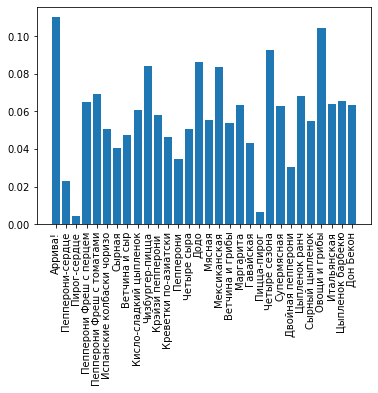

In [149]:
bar(list(range(len(pizzas_marks))),[pizzas_marks[i] for i in pizzas_marks])
plt.xticks(list(range(len(pizzas_marks))), list(pizzas_marks), rotation=90)

Итак: Аррива и Овощи с грибами - самые оптимальные пиццы по соотношению цена-качество. Мы нашли их.